# Notebook to explore clean data


[Wind generation in ERCOT](#Wind-generation)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

/Users/Home/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Wind generation

ERCOT provides hourly data on the aggregate level of wind power across the state from 2007-2015. The data files also contain total ERCOT load in MW and the total installed capacity of wind turbines (MW). With this data we can see how ERCOT demand evolved over the 8 years, how wind generation  increased, and the change in how much of the total load was met with wind.

In [2]:
filename = 'ERCOT wind data.csv'
path = '../Clean Data'
fullpath = os.path.join(path, filename)

In [3]:
ercot = pd.read_csv(fullpath, index_col=0)

In [4]:
ercot.head()

,"ERCOT Load, MW","Total Wind Installed, MW","Total Wind Output, MW","Wind Output, % of Installed","Wind Output, % of Load",1-hr MW change,1-hr % change
2007-01-01 00:00:00,30428.0,2790.0,1074.0,38.494624,3.529644,NaN,NaN
2007-01-01 01:00:00,30133.0,2790.0,922.6,33.068100,3.061760,-151.4,-14.096834
2007-01-01 02:00:00,29941.0,2790.0,849.2,30.437276,2.836245,-73.4,-7.955777
2007-01-01 03:00:00,29949.0,2790.0,1056.3,37.860215,3.526996,207.1,24.387659
2007-01-01 04:00:00,30248.0,2790.0,837.1,30.003584,2.767456,-219.2,-20.751680


Distribution of wind output as % of load for the whole dataset.

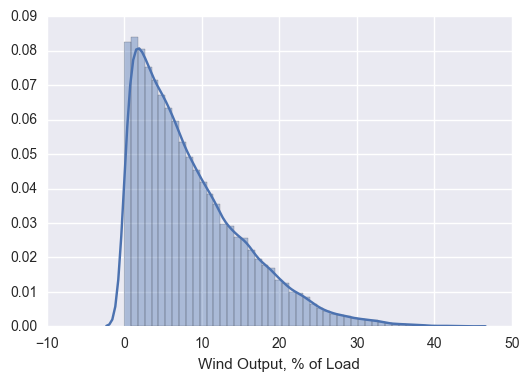

In [5]:
sns.distplot(ercot['Wind Output, % of Load'])

How does this distribution change over time? Need to set a year column.

In [5]:
ercot['year'] = pd.to_datetime(ercot.index).year

The figure below shows a clear shift in the amount of generation from wind over time. In 2007 it was rarely above 10%, and the lowest bin is ~40% of the total. The distribution flattens considerably by 2010, and by 2013 starts creeping above 30% of total load.

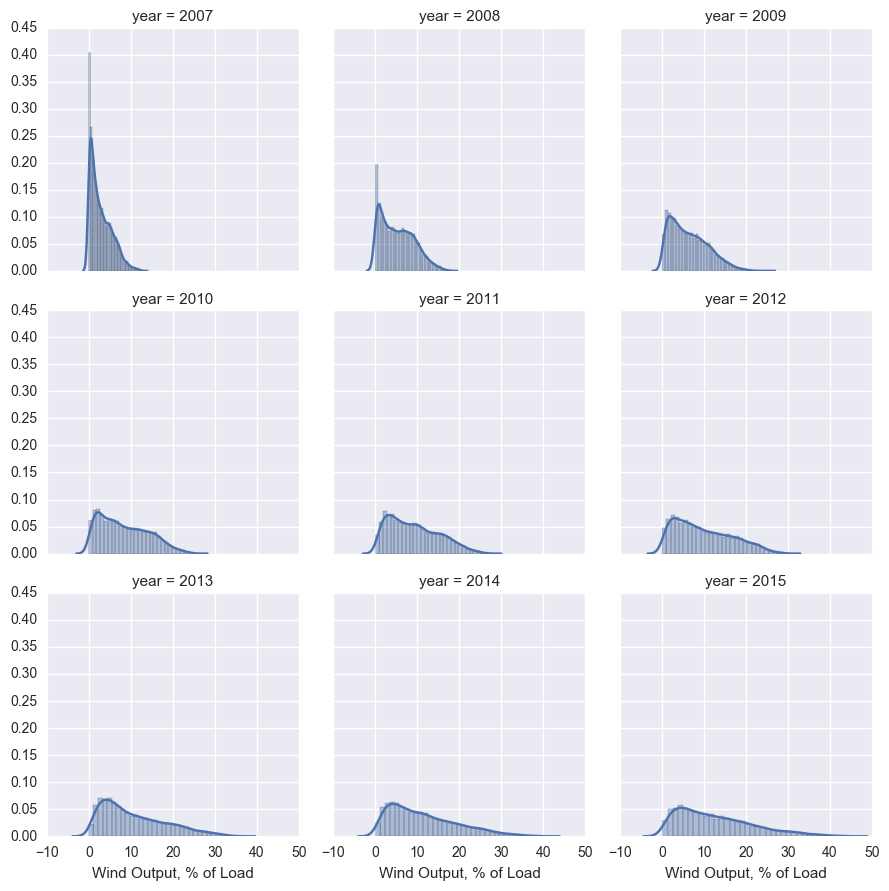

In [7]:
g = sns.FacetGrid(ercot, col='year', col_wrap=3)
g.map(sns.distplot, 'Wind Output, % of Load')

The figures below look at total ERCOT load.

This figure shows that average load across an entire year has been increasing over time.

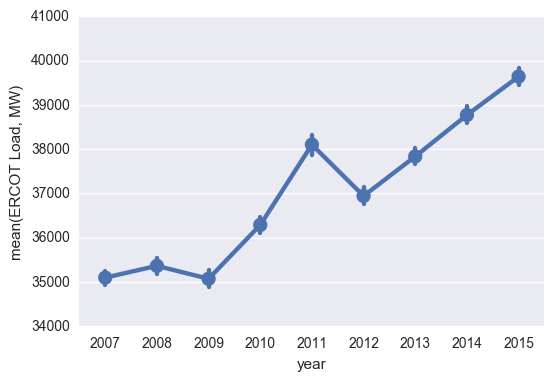

In [9]:
sns.pointplot('year', 'ERCOT Load, MW', data=ercot)

In [40]:
ercot['month'] = pd.to_datetime(ercot.index).month

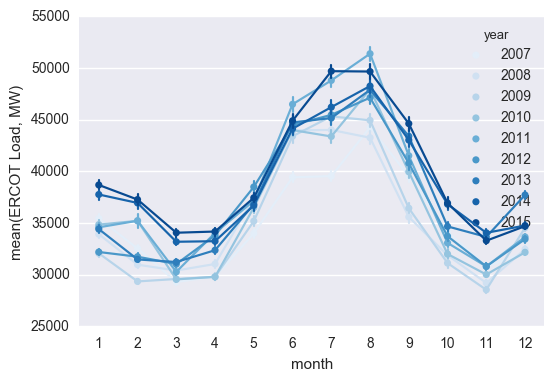

In [41]:
sns.pointplot('month', 'ERCOT Load, MW', data=ercot, hue='year', 
              palette='Blues', scale=0.5)

Interesting. There is far less of a monthly pattern to the wind generation.

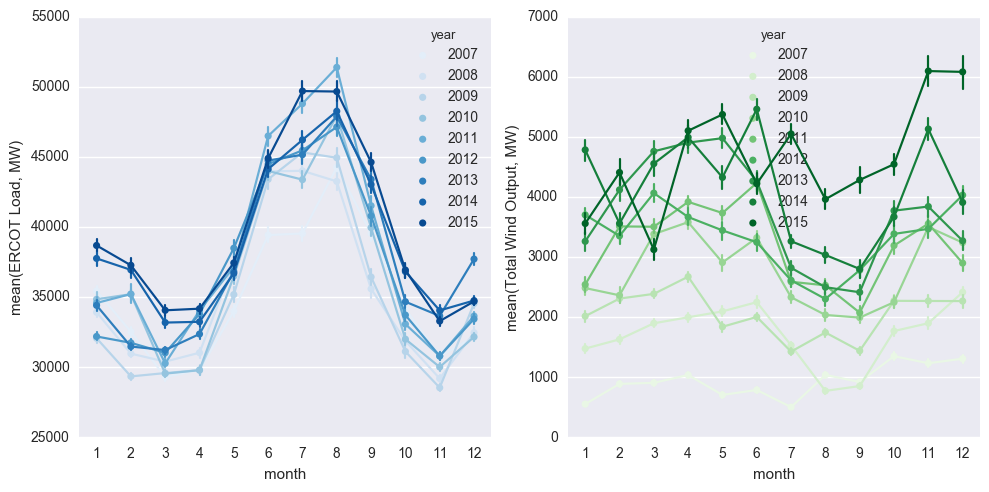

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
sns.pointplot('month', 'ERCOT Load, MW', data=ercot, hue='year', 
              palette='Blues', scale=0.5, ax=ax1)
sns.pointplot('month', 'Total Wind Output, MW', data=ercot, hue='year', 
              palette='Greens', scale=0.5, ax=ax2)

plt.tight_layout()

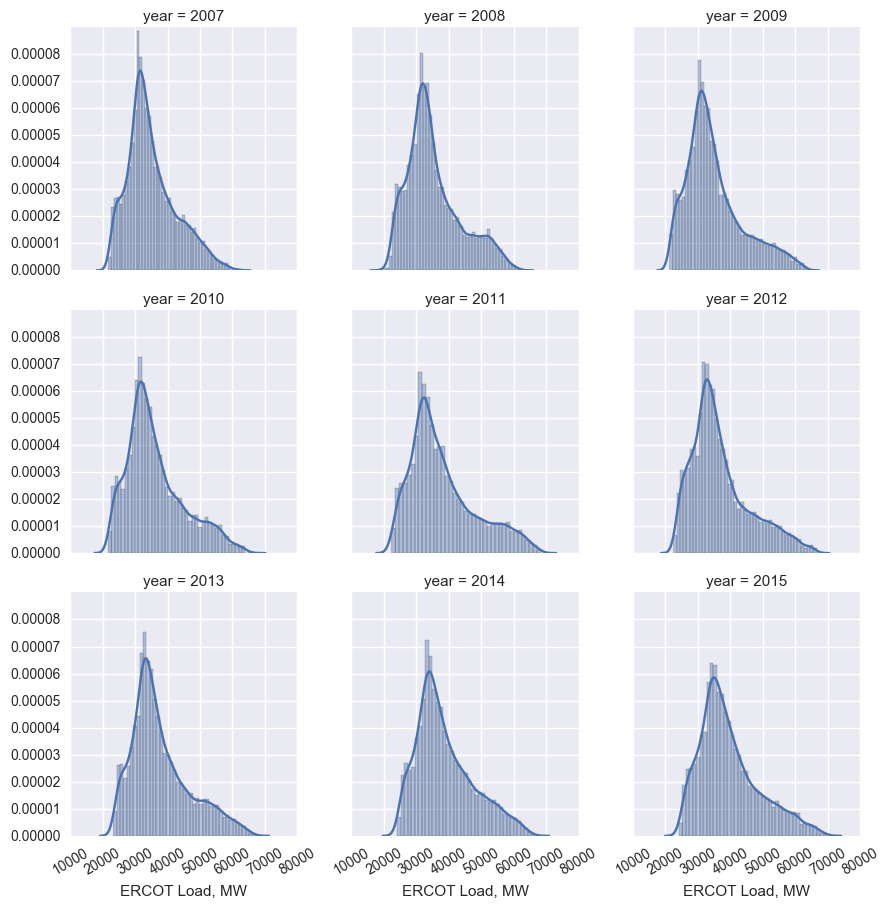

In [42]:
g = sns.FacetGrid(ercot, col='year', col_wrap=3)
g.map(sns.distplot,'ERCOT Load, MW')
g.set_xticklabels(rotation=30)